In [278]:
#Importing all the required libraries and loading the data 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
df = pd.read_csv("C:\\Users\\15513\\Downloads\\train.csv")

In [279]:
#Creating a KNN classifier from scratch


from collections import Counter

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [280]:
#Filling the values in the data frame
#The missing values in the Age column are filled with the mean of remaining values in Age column 
#The rest of the missing values are filled with NA because the mean for those columns cannot be found because of object data type

mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)
df.fillna("NA", inplace=True)

In [281]:
#In the data frame we only have age and fare assigned to various values
#In order to bound them to certain limit, we applied the standardization to only Age and Fare columns.

age_mean=df['Age'].mean()
age_std=df['Age'].std()
fare_mean=df['Fare'].mean()
fare_std=df['Fare'].std()
df['Age']=(df['Age'] - age_mean) / age_std
df['Fare']=(df['Fare'] - fare_mean) / fare_std

In [282]:
#The next step is to do one hot encoding
#One hot encoding can be done to categorical variables.
#In our data we perform one hot encoding to the categorical variables Sex and Embarked 

columns_to_encode = ['Sex', 'Embarked']
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

In [283]:
#We are using the euclidean distance in our KNN classifier
#Euclidean distance can only be found for numbers and not the objects.
#So we drop the columns that cannot be categorized and are not integers.


drop_columns = ['Name','Ticket','Cabin','PassengerId']
df_final=df_encoded.drop(columns = drop_columns)

In [284]:
#Here we are dividing the data set
#We divide it to 80% test data and 20% train data
#The target variable is Survived in our case.

X = df_final.drop(columns='Survived')  
Y = df_final['Survived']  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [290]:
#Here we are training our classifier with the train data set
#And then we are comparing it with the original test data set and the solutions that we got using our classifier.
#We found the accuracy using multiple k values
#It came out to be that we got highest accuracy when we have 6 clusters i.e. k=6

max_accuracy=0
k_values=[]
accuracy=[]
CONF_MATR=[]
for i in range(1,31):
    
    clf = KNN(k=i)
    clf.fit(X_train.values, y_train.values)
    predictions = np.array(clf.predict(X_test.values))
    acc = accuracy_score(y_test.values, predictions)
    k_values.append(i)
    accuracy.append(acc)
    if acc>max_accuracy:
        max_accuracy=acc
        K=i
print(f"The maximum accuracy obtained is: {(max_accuracy*100).astype(int)}% at k = {K}" )

The maximum accuracy obtained is: 83% at k = 6


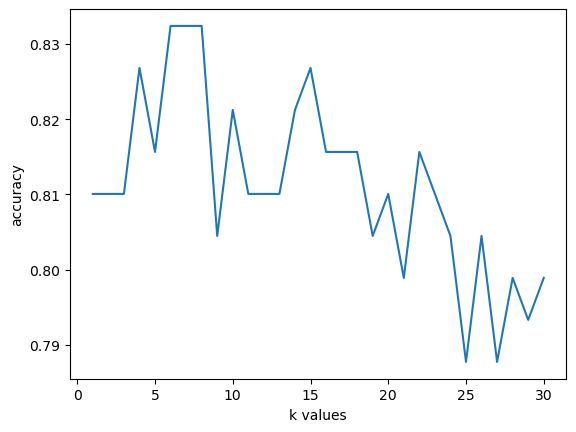

In [291]:
#Here we are plotting the accuracy with respect to k values to have a clear viisualization of the model.

x = k_values
y = accuracy
plt.plot(x, y)
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()

In [292]:
#Here we are using 5 Fold cross validation to find out the mean of the accuracy and standard deviation of the accuracy.

from sklearn.model_selection import KFold

folds=5
kf = KFold(n_splits=folds)

accuracies = []

for train_index, test_index in kf.split(X.values):
    X_train1, X_test1 = X.iloc[train_index], X.iloc[test_index]
    y_train1, y_test1 = Y.iloc[train_index], Y.iloc[test_index]
    clf1 = KNN(k=6)  
    clf1.fit(X_train1.values, y_train1.values)
    predictions1 = np.array(clf1.predict(X_test1.values))
    accuracy1 = accuracy_score(y_test1.values, predictions1)
    accuracies.append(accuracy1)


mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f'Mean Accuracy = {(mean_accuracy*100).astype(int)}%')
print(f'Std of Accuracy = {std_accuracy}')

Mean Accuracy = 79%
Std of Accuracy = 0.021531379926021516


In [293]:
#Here we are evaluating using confusion matrix
#confusion matrix is [[TP,FP],[FN,TN]]
#accuracy = (TP+TN)/(TP+FP+FN+TN)

clf2 = KNN(k=6)
clf2.fit(X_train.values, y_train.values)
predictions2 = np.array(clf2.predict(X_test.values))
conf_matrix = confusion_matrix(y_test.values, predictions2)
accuracy2 =(conf_matrix[0][0]+conf_matrix[1][1])/(sum(sum(conf_matrix)))
print(f"Calculated accuracy is {(accuracy2*100).astype(int)}%")

Calculated accuracy is 83%


Conclusion:
When we have found out the accuracy for the train and test split model that we have splitted, we got various accuracies for various k values that we have considered. Out of all the k values, we got a good accuracy for the data set at k=6 and the accuracy came out as 83%.
Later we have considered 5 fold cross validation. In this we divide the whole data set in to 5 parts. In each iteration we take 4 data sets as training data and the remaining one as testing data. In each of these iterations the accuracy of the model after we test the data using our KNN model is achieved. At the end we consider the mean of all these accuracies. This is beneficial because, in the first step we have only considered one case for testing and trainig. But here we test it 5 times on different trainig data and testing data. Hence, even if we consider a single model the accuarcy would be somewhere around the mean accuracy that we got using this cross validation. In our case for the first case we got an accuarcy of 83% and using cross validation we got an accuracy of 79% which is almost close.
We have also considered taking the confusion matrix when k=6 and found the accuracy theoretically, which is same as what we got in first case.
Hence, we can conclude that when we have 6 clusters then we could aptly divide any incoming data for our model.